<a href="https://colab.research.google.com/github/Harinijuluru/Explainable-AI/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=90f5a03927d836e76dd6898ce9662958b5e7b30f5fad9af6615c7c36d3b65939
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [2]:
!pip install pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
import shap
import lime
from lime import lime_tabular
from sklearn.inspection import partial_dependence

Dataset Shape: (1000, 10)

Data Types:
 age                            int64
gender                        object
pack_years                   float64
radon_exposure                object
asbestos_exposure             object
secondhand_smoke_exposure     object
copd_diagnosis                object
alcohol_consumption           object
family_history                object
lung_cancer                   object
dtype: object

Missing Values:
 age                            0
gender                         0
pack_years                     0
radon_exposure                 0
asbestos_exposure              0
secondhand_smoke_exposure      0
copd_diagnosis                 0
alcohol_consumption          334
family_history                 0
lung_cancer                    0
dtype: int64

Summary Statistics:
                age   pack_years
count  1000.000000  1000.000000
mean     56.994000    49.090413
std      23.605363    28.778144
min      18.000000     0.408278
25%      36.000000    23.905660
5

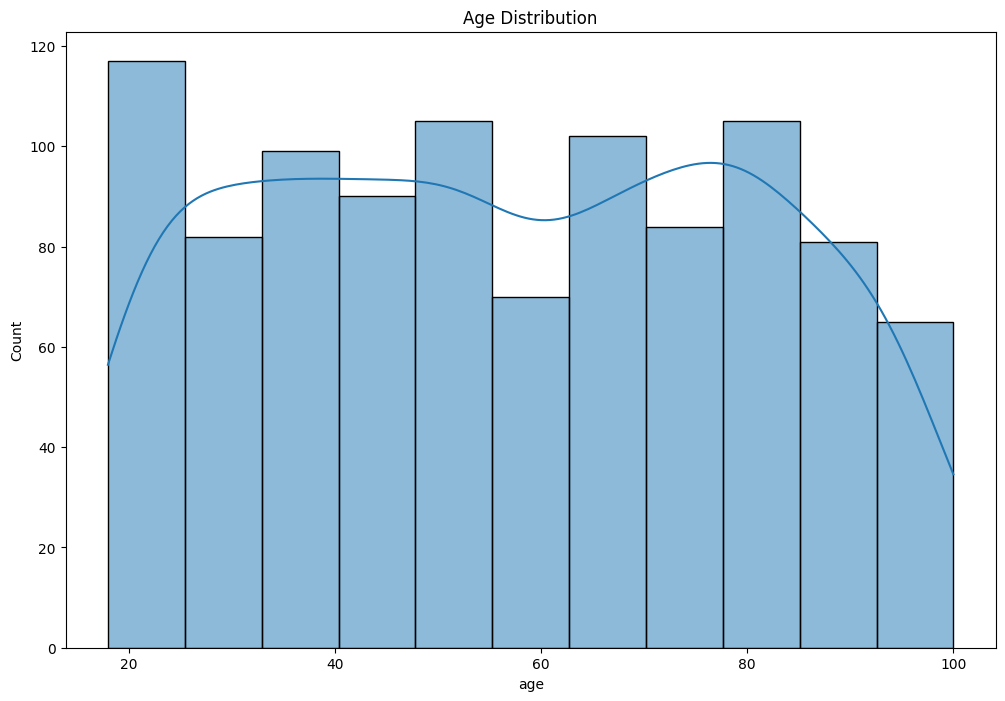

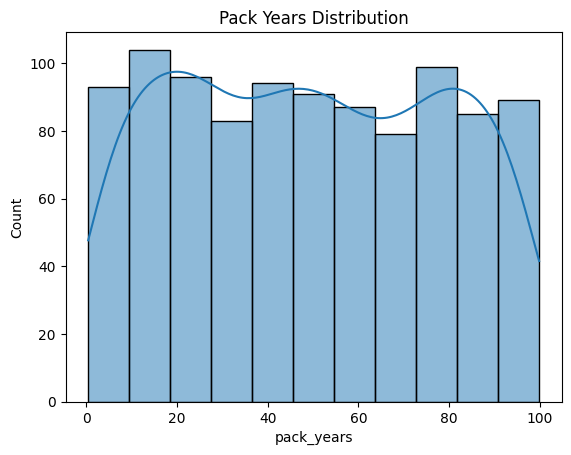

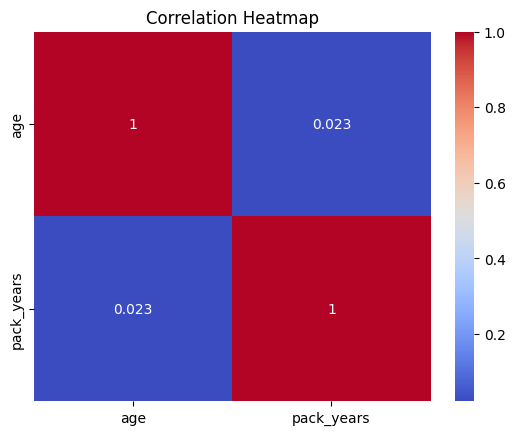

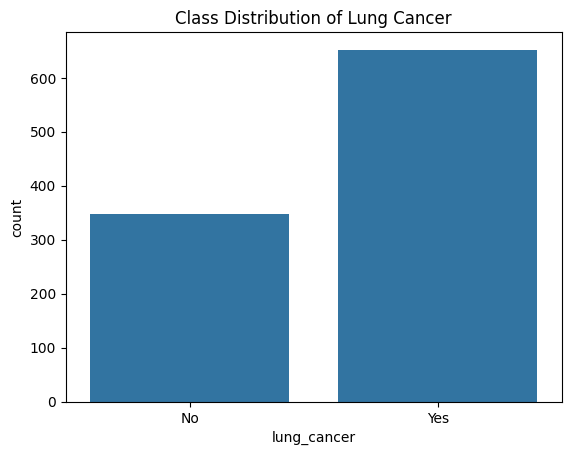


Class Counts:
 lung_cancer
Yes    652
No     348
Name: count, dtype: int64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and limit dataset to 1,000 rows
df = pd.read_csv('/content/lung_cancer_dataset.csv').head(1000)

# Drop patient_id as it's not useful
df.drop('patient_id', axis=1, inplace=True)

# Part 1: Exploratory Data Analysis (EDA)
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

print("\nSummary Statistics:\n", df.describe())

plt.figure(figsize=(12, 8))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['pack_years'], kde=True)
plt.title('Pack Years Distribution')
plt.show()

numerical_cols = ['age', 'pack_years']
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.countplot(x='lung_cancer', data=df)
plt.title('Class Distribution of Lung Cancer')
plt.show()
print("\nClass Counts:\n", df['lung_cancer'].value_counts())